In [7]:
import keras
import numpy as np
import pandas as pd
import os
import struct

In [8]:
"""
Loosely inspired by http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
which is GPL licensed.
"""

def read(dataset = "training", path = "."):
    """
    Python function for importing the MNIST data set.  It returns an iterator
    of 2-tuples with the first element being the label and the second element
    being a numpy.uint8 2D array of pixel data for the given image.
    """
    if dataset is "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset is "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        print("wrong input")

    # Load everything in some numpy arrays
    with open(fname_lbl, 'rb') as flbl:
        magic, num = struct.unpack(">II", flbl.read(8))
        lbl = np.fromfile(flbl, dtype=np.int8)

    with open(fname_img, 'rb') as fimg:
        magic, num, rows, cols = struct.unpack(">IIII", fimg.read(16))
        img = np.fromfile(fimg, dtype=np.uint8).reshape(len(lbl), rows, cols)

    get_img = lambda idx: (lbl[idx], img[idx])

    # Create an iterator which returns each image in turn
    for i in range(len(lbl)):
        yield get_img(i)

def show(image):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    pyplot.show()
    
def create_output_row(num):
    newrow = np.array([0,0,0,0,0,0,0,0,0,0])
    newrow[num-1] = 1
    
    return newrow
    
def create_training_data_output(data, iters = 60000):
    A = list()
    for i in range(iters):
        A.append(create_output_row(data[i][0]))
    
    return np.array(A)
        
    
def create_training_data_input(data, iters = 60000):
    A = list()
    for i in range(iters):
        A.append(data[i][1].flatten())
        
    return np.array(A)
    

In [9]:
## create the model
model = keras.models.Sequential(layers=[
    keras.layers.Dense(input_dim=784, units=16),
    keras.layers.Activation(keras.activations.sigmoid),
    keras.layers.Dense(units=16),
    keras.layers.Activation(keras.activations.sigmoid),
    keras.layers.Dense(units=10),
    keras.layers.Activation(keras.activations.sigmoid)
])
model.compile(optimizer=keras.optimizers.SGD(lr=0.5),loss='mse')

In [10]:
# format the training data OUTPUT
training_data_raw = list(read("training", "../data/"))
training_data_output = create_training_data_output(training_data_raw)
# format the training data INPUT
training_data_raw = list(read("training", "../data/"))
training_data_input = create_training_data_input(training_data_raw)

# format the testing data OUTPUT
testing_data_raw = list(read("testing", "../data/"))
testing_data_output = create_training_data_output(testing_data_raw, iters=10000)
# format the testing data INPUT
testing_data_raw = list(read("testing", "../data/"))
testing_data_input = create_training_data_input(testing_data_raw, iters=10000)


In [11]:
def train_model(epochs, model=model):
    model.fit(training_data_input,training_data_output,epochs=epochs,verbose=False)

In [12]:
def get_num_correct(data_out, data_in, iters=60000):
    total = 0
    for i in range(iters):
        a = list()
        a.append(data_in[i])
        a = np.array(a)
        pred = model.predict(a)[0]
        
        m = max(pred)
        pos1 = [i for i, j in enumerate(pred) if j == m]
        
        ans = max(data_out[i])
        pos2 = [i for i, j in enumerate(data_out[i]) if j == ans]
        
        if pos1 == pos2:
            total += 1
            
    return total

def test_model():
    return get_num_correct(testing_data_output,testing_data_input ,iters=10000)

In [23]:

for i in range(10):
    train_model(1)
    results.append(test_model())

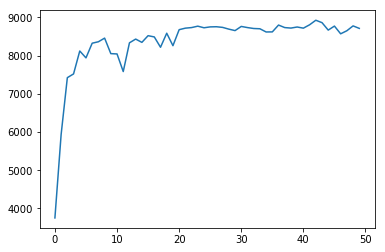

In [24]:
import matplotlib.pyplot as plt
plt.plot(results)
plt.show()